In [ ]:
#!pip install -U scikit-learn
import sklearn
print(sklearn.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 78.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


1.6.1


# Task
Load, inspect, clean, and visualize the pollution data from the 'pollution_data.csv' file. After cleaning and visualization, summarize the data cleaning process and provide insights gained from the visualizations.

## Load Data

### Subtask:
Load the pollution data from the 'pollution_data.csv' file into a pandas DataFrame.


**Reasoning**:
Load the 'pollution_data.csv' file into a pandas DataFrame as instructed.



In [1]:
import pandas as pd
df = pd.read_csv('pollution_datasets.csv')
print("Data loaded successfully. First 5 rows:")
print(df.head())

Data loaded successfully. First 5 rows:
   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  roads  dump_sites  agricultural_fields  \
0                            6.3     34           4                    3   
1                            6.0     28           2                    3   
2                            5.2     36           0                   11   
3                           11.1     45           3                    9   
4                           12.7     27           2                    4   

   wind_speed  wind_direction  
0         0.3             355  
1         0.5             355  
2         0.6             355  
3         0.5       

## Inspect Data

### Subtask:
Inspect the loaded data to understand its structure, identify data types, and check for missing values or inconsistencies.


**Reasoning**:
Display the DataFrame's information to check data types, non-null counts, and memory usage, then calculate and show the sum of null values per column to identify missing data.



In [2]:
print("DataFrame Info:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5200 non-null   float64
 1   Humidity                       5200 non-null   float64
 2   PM2.5                          5200 non-null   float64
 3   PM10                           5200 non-null   float64
 4   NO2                            5200 non-null   float64
 5   SO2                            5200 non-null   float64
 6   CO                             5200 non-null   float64
 7   Proximity_to_Industrial_Areas  5200 non-null   float64
 8   roads                          5200 non-null   int64  
 9   dump_sites                     5200 non-null   int64  
 10  agricultural_fields            5200 non-null   int64  
 11  wind_speed                     5200 non-null   float64
 12  wind_direction                 5

**Reasoning**:
To further inspect the data and understand the distribution and potential outliers of numerical columns, and to check for the unique categories in the 'Air Quality' column, descriptive statistics are needed for numerical columns and value counts for the categorical column.



In [3]:
print("Descriptive statistics for numerical columns:")
print(df.describe())


Descriptive statistics for numerical columns:
       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5200.000000  5200.000000  5200.000000  5200.000000  5200.000000   
mean     30.020596    70.070731    23.389599    30.136558    27.142136   
std       6.727288    15.848501    34.722867    27.273542    10.161869   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.700000    12.300000    20.200000   
50%      29.000000    69.800000    12.300000    21.600000    25.400000   
75%      34.000000    80.400000    27.700000    38.000000    32.400000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas        roads  \
count  5200.000000  5200.000000                    5200.000000  5200.000000   
mean     10.633328     1.500131                       8.434115    29.547885   
std       8.066453     0.546102                   

# Task
Load, inspect, clean, and visualize the pollution data from the 'pollution_data.csv' file. After cleaning and visualization, summarize the data cleaning process and provide insights gained from the visualizations.

## Clean Data

### Subtask:
Perform necessary data cleaning steps, such as handling missing values, correcting data types, or addressing outliers, based on the initial inspection.


**Reasoning**:
Based on the initial inspection, replace negative values in 'PM10' and 'SO2' with 0 and cap 'Humidity' values above 100 at 100 to ensure data validity.



In [4]:
df['PM10'] = df['PM10'].apply(lambda x: max(x, 0))
df['SO2'] = df['SO2'].apply(lambda x: max(x, 0))
df['Humidity'] = df['Humidity'].apply(lambda x: min(x, 100))
print("Negative values in PM10 and SO2 replaced with 0. Humidity values capped at 100.")
print("Descriptive statistics after cleaning:")
print(df.describe())

Negative values in PM10 and SO2 replaced with 0. Humidity values capped at 100.
Descriptive statistics after cleaning:
       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5200.000000  5200.000000  5200.000000  5200.000000  5200.000000   
mean     30.020596    69.827942    23.389599    30.136596    27.142136   
std       6.727288    15.293109    34.722867    27.273499    10.161869   
min      13.400000    36.000000     0.000000     0.000000     7.400000   
25%      25.100000    58.300000     4.700000    12.300000    20.200000   
50%      29.000000    69.800000    12.300000    21.600000    25.400000   
75%      34.000000    80.400000    27.700000    38.000000    32.400000   
max      58.600000   100.000000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas        roads  \
count  5200.000000  5200.000000                    5200.000000  5200.000000   
mean     10.639040     1.500131                       8.

## Visualize Data

### Subtask:
Generate relevant visualizations (e.g., time series plots, histograms, or scatter plots) to represent key aspects of the cleaned pollution data. Ensure plots include appropriate labels and legends.


**Reasoning**:
First, import `matplotlib.pyplot` and `seaborn` for plotting. Then, create a bar plot for the 'Air Quality' column to visualize its distribution. Next, generate histograms for the pollution metrics ('PM2.5', 'PM10', 'NO2', 'SO2', 'CO') to understand their distributions. Finally, create histograms for environmental factors ('Temperature', 'Humidity', 'Proximity_to_Industrial_Areas', 'Population_Density') to examine their distributions, ensuring all plots have proper labels and titles and are displayed correctly.



# Task
Generate histograms for pollution metrics ('PM2.5', 'PM10', 'NO2', 'SO2', 'CO') and environmental factors ('Temperature', 'Humidity', 'Proximity_to_Industrial_Areas', 'roads', 'dump_sites', 'agricultural_fields', 'wind_speed', 'wind_direction') to understand their distributions. Ensure all plots have proper labels and titles and are displayed correctly, then summarize the data cleaning process and provide insights gained from the corrected visualizations.

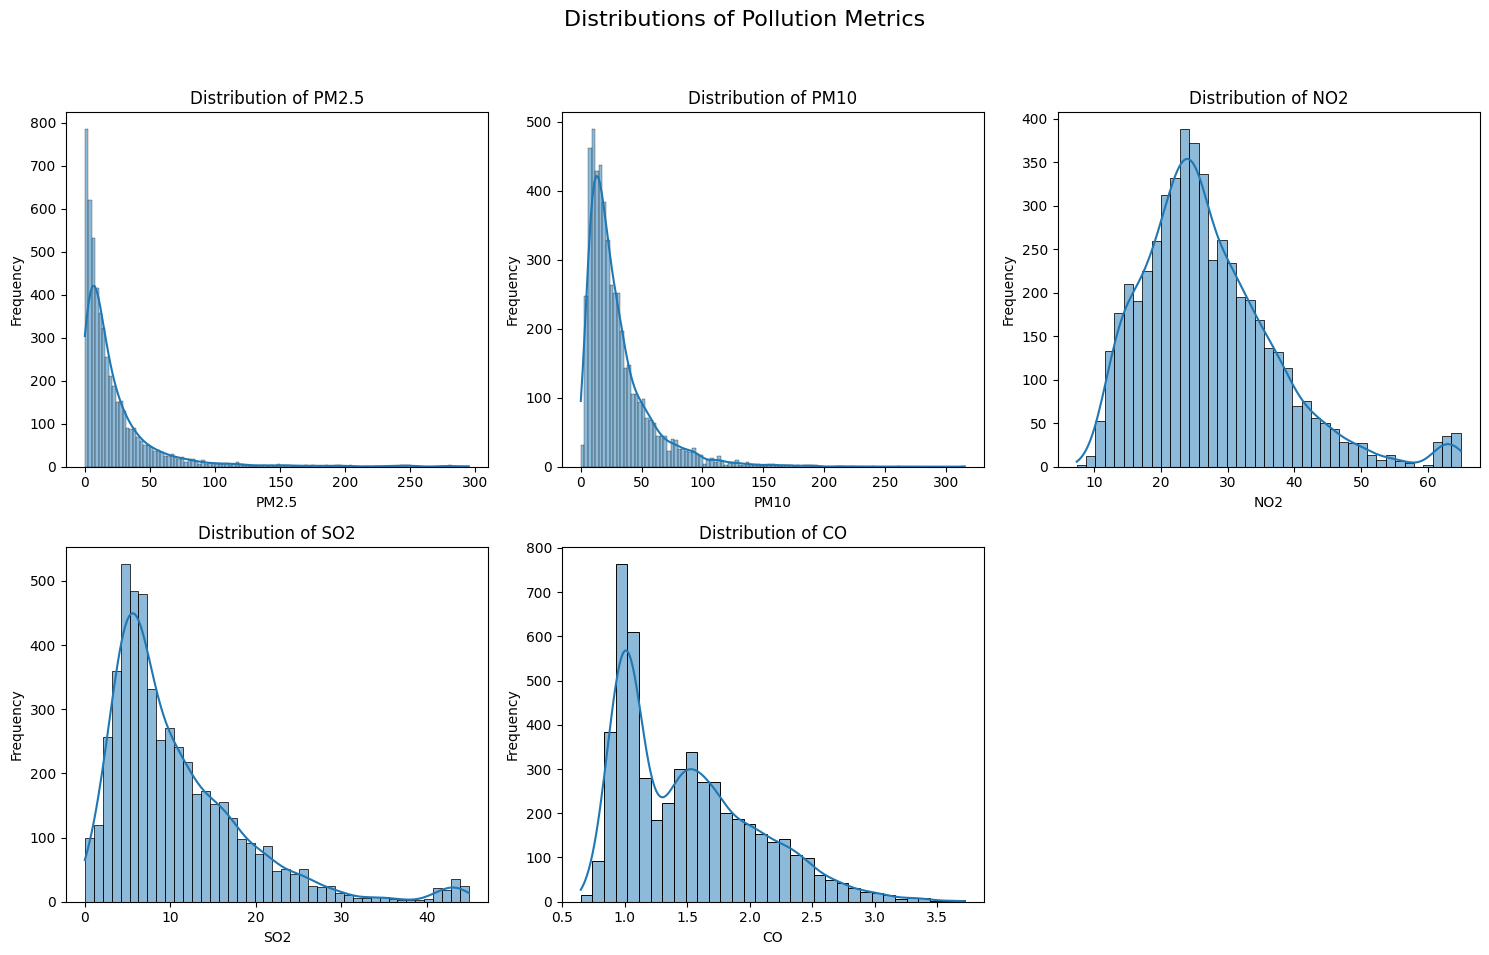

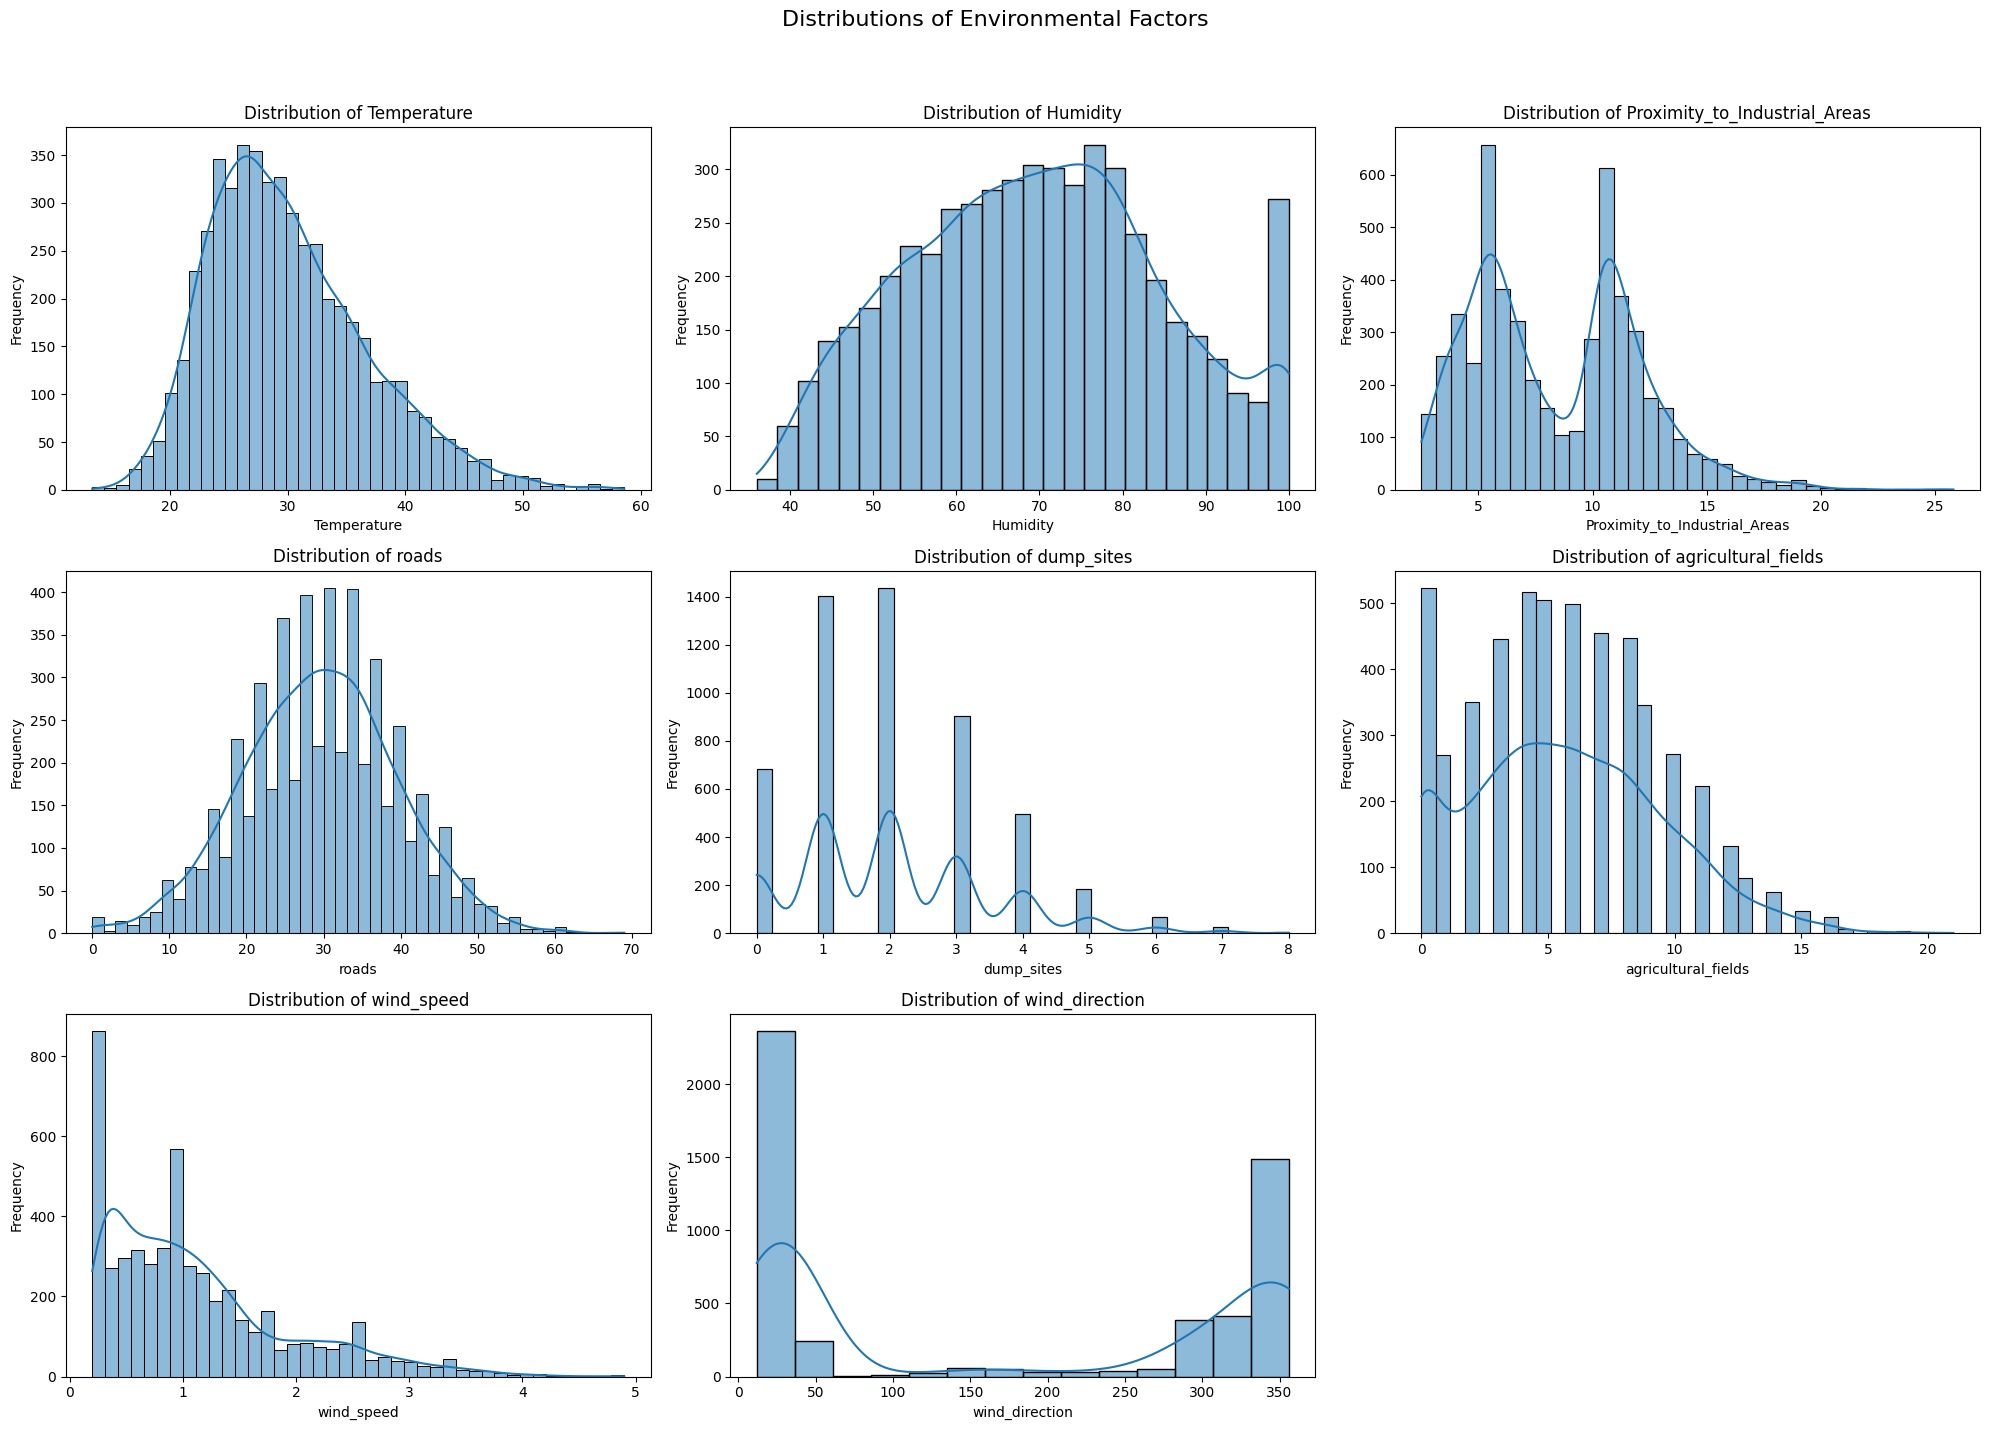

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for pollution metrics
pollution_metrics = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']
plt.figure(figsize=(15, 10))
plt.suptitle('Distributions of Pollution Metrics', fontsize=16)
for i, col in enumerate(pollution_metrics):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Histograms for environmental factors
environmental_factors = ['Temperature', 'Humidity', 'Proximity_to_Industrial_Areas', 'roads', 'dump_sites', 'agricultural_fields', 'wind_speed', 'wind_direction']
plt.figure(figsize=(20, 15))
plt.suptitle('Distributions of Environmental Factors', fontsize=16)
for i, col in enumerate(environmental_factors):
    plt.subplot(3, 3, i + 1) # Adjust subplot layout for 8 plots
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [6]:
df = df.rename(columns={
    "PM2.5": "PM2_5"
})
df.columns


Index(['Temperature', 'Humidity', 'PM2_5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'roads', 'dump_sites',
       'agricultural_fields', 'wind_speed', 'wind_direction'],
      dtype='object')

In [7]:
#create_pollution_Source
def create_pollution_source(row):
    vehicular = row["NO2"] > 30 and row["CO"] > 1.2 and row["roads"] > 25
    industrial = (
        row["SO2"] > 12 and
        row["Proximity_to_Industrial_Areas"] > 0.6  )
    agricultural = row["PM2_5"] > 35 and row["agricultural_fields"] > 6
    biomass = row["PM2_5"] > 40 and row["CO"] > 1.0 and not industrial

    flags = [vehicular, industrial, agricultural, biomass]

    if sum(flags) >= 2:
        return "Mixed"
    if vehicular:
        return "Vehicular"
    if industrial:
        return "Industrial"
    if agricultural:
        return "Agricultural"
    if biomass:
        return "Biomass"
    return "Natural"



In [8]:
df["pollution_source"] = df.apply(create_pollution_source, axis=1)
df["pollution_source"].value_counts()


pollution_source
Natural         2853
Mixed            950
Industrial       905
Vehicular        295
Biomass          149
Agricultural      48
Name: count, dtype: int64

In [9]:
df[["PM2_5", "NO2", "SO2", "CO", "roads", "pollution_source"]].head()


,PM2_5,NO2,SO2,CO,roads,pollution_source
0,5.2,18.9,9.2,1.72,34,Natural
1,2.3,30.8,9.7,1.64,28,Vehicular
2,26.7,24.4,12.6,1.63,36,Industrial
3,6.1,13.5,5.3,1.15,45,Natural
4,6.9,21.9,5.6,1.01,27,Natural


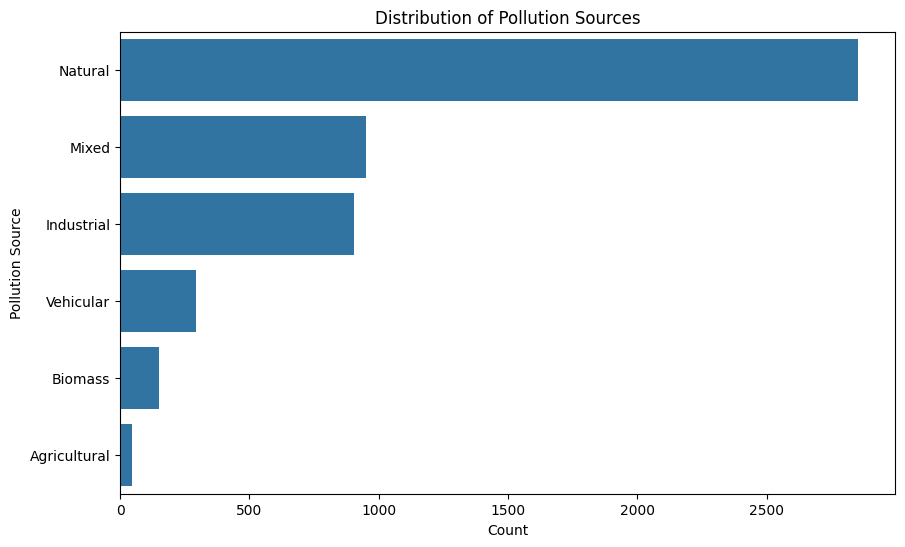

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(
    y="pollution_source",
    data=df,
    order=df["pollution_source"].value_counts().index
)
plt.title("Distribution of Pollution Sources")
plt.xlabel("Count")
plt.ylabel("Pollution Source")
plt.show()

In [12]:
#Label_encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["pollution_source_encoded"] = le.fit_transform(df["pollution_source"])

print("Classes:", le.classes_)


Classes: ['Agricultural' 'Biomass' 'Industrial' 'Mixed' 'Natural' 'Vehicular']


In [13]:
#Define Feature and Target
FEATURE_COLS = [
    "Temperature",
    "Humidity",
    "PM2_5",
    "PM10",
    "NO2",
    "SO2",
    "CO",
    "Proximity_to_Industrial_Areas",
    "roads",
    "dump_sites",
    "agricultural_fields",
    "wind_speed",
    "wind_direction"
]

X = df[FEATURE_COLS]
y = df["pollution_source_encoded"]


In [14]:
#Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [15]:
#mmodel_training_Randomforest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [16]:
#Acuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy :", model.score(X_test, y_test))


Train accuracy: 0.9935096153846154
Test accuracy : 0.9846153846153847


In [17]:
#Report for classify
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(
    classification_report(
        y_test,
        y_pred,
        target_names=le.classes_
    )
)


              precision    recall  f1-score   support

Agricultural       0.83      1.00      0.91        10
     Biomass       0.79      1.00      0.88        30
  Industrial       1.00      1.00      1.00       181
       Mixed       0.99      0.97      0.98       190
     Natural       1.00      0.99      0.99       570
   Vehicular       0.95      0.95      0.95        59

    accuracy                           0.98      1040
   macro avg       0.93      0.98      0.95      1040
weighted avg       0.99      0.98      0.99      1040



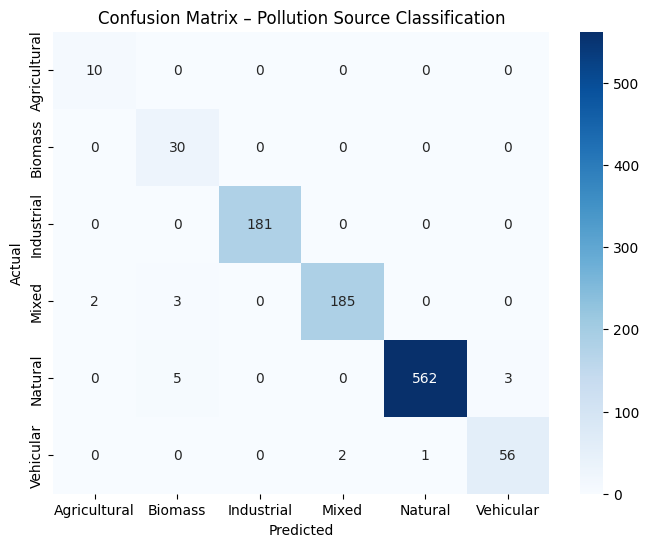

In [18]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=le.classes_,
    yticklabels=le.classes_,
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Pollution Source Classification")
plt.show()


In [19]:
import pandas as pd

importance = pd.Series(
    model.feature_importances_,
    index=FEATURE_COLS
).sort_values(ascending=False)

importance



,0
SO2,0.226886
PM2_5,0.190814
NO2,0.143963
PM10,0.096097
agricultural_fields,0.090066
roads,0.085744
CO,0.070040
Proximity_to_Industrial_Areas,0.038849
Temperature,0.020884
Humidity,0.015054


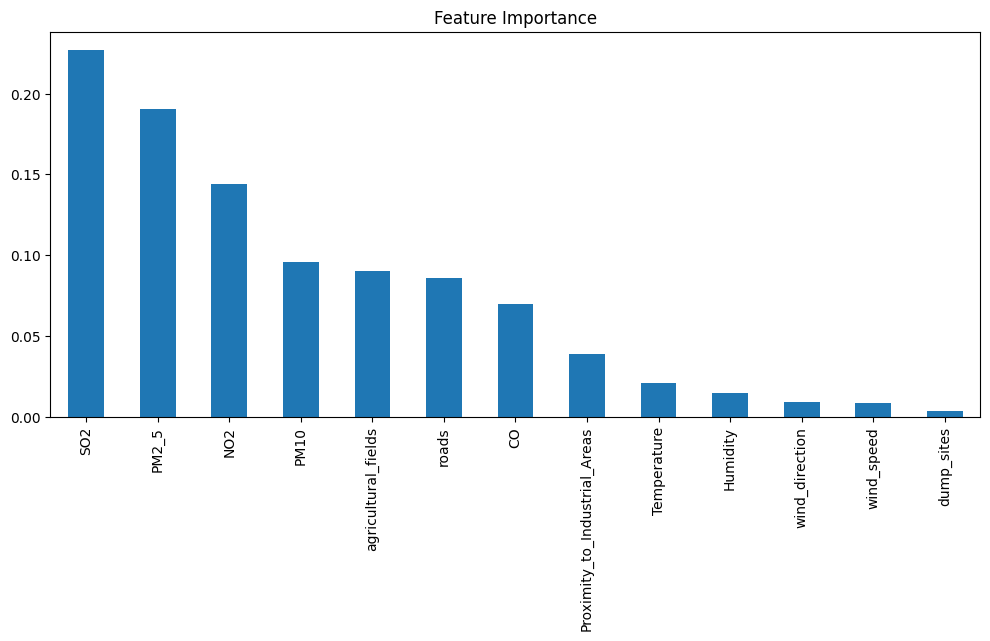

In [20]:
importance.plot(kind="bar", figsize=(12,5), title="Feature Importance")
plt.show()

In [21]:
import joblib

joblib.dump(model, "randomforest_pollution_model.pkl")
joblib.dump(le, "pollution_label_encoder.pkl")
FEATURE_COLS = [
    "Temperature",
    "Humidity",
    "PM2_5",
    "PM10",
    "NO2",
    "SO2",
    "CO",
    "Proximity_to_Industrial_Areas",
    "roads",
    "dump_sites",
    "agricultural_fields",
    "wind_speed",
    "wind_direction"
]

joblib.dump(FEATURE_COLS, "model_feature_order.pkl")


['model_feature_order.pkl']